In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

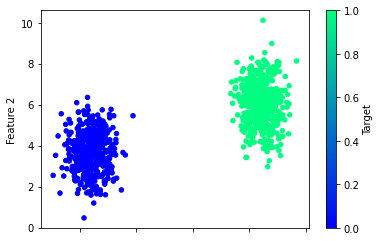

In [2]:
# Use make_blobs to create 1000 samples with two features (x and y)
# that are linearly separable into two groups 

# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data 
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# split the data into training and testing dataset using train_test_split

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Normalize the data before Neural Network model
# the more stabilize the model, the better Neural network model will generalize 

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model to start neural network model 
nn_model = tf.keras.models.Sequential()

In [6]:
# Add first layer that contains inputs and hidden layer of neutrons to the model 
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# To suppy number of output neutron. Use Sigmoid function activation to produce probbilty output 
# Add the output layer that uses a probability activation function 
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# To check the structure of the Sequential model (after adding layers to Sequential model)
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 911us/step - loss: 0.5775 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 998us/step - loss: 0.5007 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 1.0000
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 867us/step - loss: 0.0924 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 867us/step - loss: 0.0909 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0894 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 867us/step - loss: 0.0880 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 824us/step - loss: 0.0852 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 867us/step - loss: 0.0825 - accuracy: 1.0000
Epo

<AxesSubplot:>

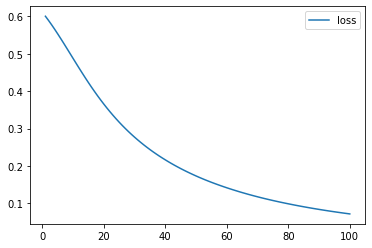

In [11]:
# Model objects stores loss and accuracy metrics across Epochs
# Create DataFrame containing training history 
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

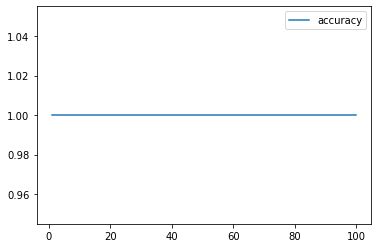

In [12]:
# Plot the accuracy over time using same DF

# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Testing neural network model in TensorFlow. Use "evaluate" model to print loss and accuracy values
# Evaluate the model using testing data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0669 - accuracy: 1.0000 - 131ms/epoch - 16ms/step
Loss: 0.06686293333768845, Accuracy: 1.0


In [14]:
# Predict classification of new set of Blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# 19.2.4

### Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

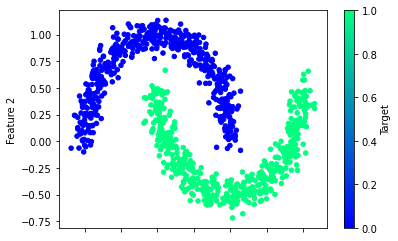

In [15]:
# create dummy data to generate nonlinear moon-shaped data 
# Use make_moons method, visualize it using Pandas and Matplotlib

from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [16]:
# With previous dummy data, need to split nonlinear data into training and testing
# and normalize the datasets 

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, 
                                                                        random_state=78)

# Create the scaler instance to normalize
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [17]:
# After training and normalizing the data, Train neural network model using "fit" method
# on the Non-linear traning data 

# Training the model with the nonlinear data 
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0890 - accuracy: 0.4680
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.4987
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8825 - accuracy: 0.5227
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.5413
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7859 - accuracy: 0.5627
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.5733
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5840
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.5907
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5987
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6093
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8733
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8733
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8747
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.8760
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8773
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8787
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8800
Epoch 93/100


<AxesSubplot:>

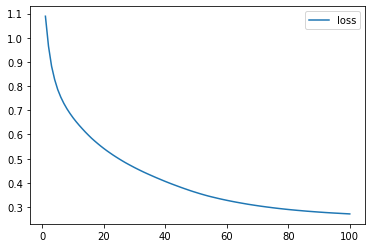

In [18]:
# Plot the loss and accuracy curves over Training iteration 

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

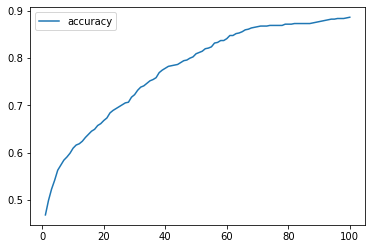

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

# Multiple-Neuron Neural Networks

### 19.2.5

In [20]:
# To work with more than single neuron, need to create new Sequential model 
# and train the datasets

# Generate our new Sequential model 
new_model = tf.keras.models.Sequential()

In [22]:
# Add six neurons to Units parameter 

# Add input and hidden layer 
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function 
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Once new Sequential model is created, compile and train the model using non-linear moon-shaped datas

# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7667
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7800
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7920
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7987
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8053
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8187
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8347
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8520
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8640
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8773
Epoch 11/

24/24 [==============================] - 0s 824us/step - loss: 0.0872 - accuracy: 0.9693
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9733
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9800
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9800
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9827
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9867
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9867
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9907
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9933
Epoch 92/100
24/24 [==============================] - 0s 997us/step - loss: 0.0597 - accuracy: 0.9947
Epoch 93/